<a href="https://colab.research.google.com/github/emincingoz/Machine_Learning_Collection/blob/main/Basic_NN_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# Loading Dataset

Load dataset from torchvision

* `root` is the path where the train/test data is stored,
* `train` specifies training or test dataset,
* `download=True` downloads the data from the internet if it’s not available at root.
* `transform` and `target_transform` specify the feature and label transformations

In [6]:
# Download the train dataset
train_data = datasets.FashionMNIST(root = "MyDrive/PyTorch/Datasets/FashionMNIST/", 
                                   train = True, 
                                   download = True, 
                                   transform = ToTensor())

# Download the test dataset
test_data = datasets.FashionMNIST(root = "MyDrive/PyTorch/Datasets/FashionMNIST/", 
                                  train = False, 
                                  download = True, 
                                  transform = ToTensor())

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting MyDrive/PyTorch/Datasets/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to MyDrive/PyTorch/Datasets/FashionMNIST/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting MyDrive/PyTorch/Datasets/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to MyDrive/PyTorch/Datasets/FashionMNIST/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting MyDrive/PyTorch/Datasets/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to MyDrive/PyTorch/Datasets/FashionMNIST/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting MyDrive/PyTorch/Datasets/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to MyDrive/PyTorch/Datasets/FashionMNIST/FashionMNIST/raw



# Visualizing Dataset

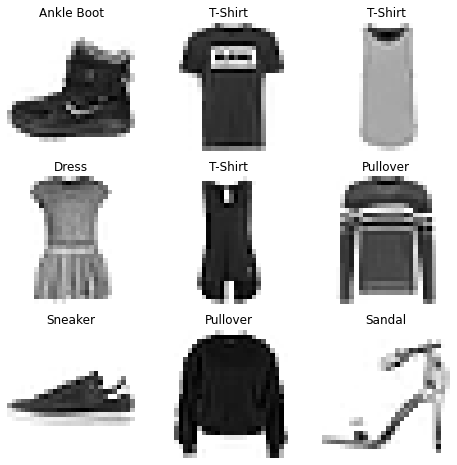

In [13]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (8, 8))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  image, label = train_data[i]
  plt.imshow(image.numpy().squeeze(), cmap = 'binary')
  plt.title(labels_map[label])
  plt.axis('off')

# Data Loaders

In [21]:
batch_size = 64

train_dataloader = DataLoader(train_data, batch_size = batch_size)
test_dataloader = DataLoader(test_data, batch_size = batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [Num_of_image, Channel, Height, Width]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [Num_of_image, Channel, Height, Width]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


# Basic Neural Network Model

In [22]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [23]:
class NeuralNetwork(nn.Module):

  def __init__(self):
    super(NeuralNetwork, self).__init__()

    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
                                            nn.Linear(in_features = 28 * 28, out_features = 512),  # Input layer
                                            nn.ReLU(), 
                                            nn.Linear(in_features = 512, out_features = 512), # Hidden layer
                                            nn.ReLU(), 
                                            nn.Linear(in_features = 512, out_features = 10) # Output layer
                                           ) 
    
  def forward(self, x):
    x = self.flatten(x)
    output = self.linear_relu_stack(x)

    return output


In [24]:
model = NeuralNetwork().to(device)  # send model into gpu with .to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


# Loss Function and Optimizer

In [27]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model.parameters(), lr = 1e-3)

# Train Operation

In [28]:
def train(data_loader, model, loss_func, optimizer):
  size = len(data_loader.dataset)
  model.train()

  for batch, (image, label) in enumerate(data_loader):
    image, label = image.to(device), label.to(device)

    # Compute prediction error
    pred = model(image)
    loss = loss_func(pred, label)

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 100 == 0:
      loss, current = loss.item(), batch * len(X)   # .item() used to type conversion to integer
      print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [29]:
def test(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  model.eval()
  test_loss, correct = 0, 0
  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()
  test_loss /= num_batches
  correct /= size
  print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [30]:
epochs = 5
for t in range(epochs):
  print(f"Epoch {t+1}\n-------------------------------")
  train(train_dataloader, model, loss_func, optimizer)
  test(test_dataloader, model, loss_func)
print("Done!")

Epoch 1
-------------------------------
loss: 2.298420  [    0/60000]
loss: 2.281410  [ 6400/60000]
loss: 2.274095  [12800/60000]
loss: 2.272450  [19200/60000]
loss: 2.234312  [25600/60000]
loss: 2.217067  [32000/60000]
loss: 2.217539  [38400/60000]
loss: 2.184042  [44800/60000]
loss: 2.195226  [51200/60000]
loss: 2.152294  [57600/60000]
Test Error: 
 Accuracy: 41.7%, Avg loss: 2.147736 

Epoch 2
-------------------------------
loss: 2.159302  [    0/60000]
loss: 2.136918  [ 6400/60000]
loss: 2.089883  [12800/60000]
loss: 2.109131  [19200/60000]
loss: 2.036816  [25600/60000]
loss: 1.991329  [32000/60000]
loss: 2.012200  [38400/60000]
loss: 1.928771  [44800/60000]
loss: 1.951982  [51200/60000]
loss: 1.869072  [57600/60000]
Test Error: 
 Accuracy: 54.7%, Avg loss: 1.866813 

Epoch 3
-------------------------------
loss: 1.902021  [    0/60000]
loss: 1.857534  [ 6400/60000]
loss: 1.750717  [12800/60000]
loss: 1.795865  [19200/60000]
loss: 1.675188  [25600/60000]
loss: 1.637502  [32000/600

# Save Model

In [34]:
torch.save(model.state_dict(), 'MyDrive/PyTorch/Models/basic_nn_model.pth')
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


# Load Model

In [35]:
model = NeuralNetwork()
model.load_state_dict(torch.load('MyDrive/PyTorch/Models/basic_nn_model.pth'))

<All keys matched successfully>

# Prediction

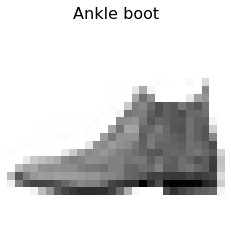

In [45]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
image, label = test_data[0][0], test_data[0][1]

plt.imshow(image.numpy().squeeze(), cmap = 'binary')
plt.title(classes[label], size = 16)
plt.axis('off')
plt.show()